In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
script to load sim and plot
"""

from netpyne import sim
from matplotlib import pyplot as plt
import os
import pickle
import numpy as np
#------------------------------------------------------------------------------  
# S1 Cells
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
# Create [Morphological,Electrical] = number of cell metype in the sub-pop

with open('cells/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

popNumber = {}
cellNumber = {} 
popLabel = {} 
cellLabel = {}

for line in mtype_content.split('\n')[:-1]:
    cellname, mtype, etype, n, m = line.split()
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n)
    popLabel[metype] = mtype
    popNumber[mtype] = int(m)
    cellLabel[metype] = cellname

#------------------------------------------------------------------------------  
# Thalamic Cells

thalamicpops = ['ss_RTN_o', 'ss_RTN_m', 'ss_RTN_i', 'VPL_sTC', 'VPM_sTC', 'POm_sTC_s1']

cellNumber['ss_RTN_o'] = int(382 * (210**2/150**2)) # from mouse model (d = 150 um)
cellNumber['ss_RTN_m'] = int(382 * (210**2/150**2))
cellNumber['ss_RTN_i'] = int(765 * (210**2/150**2))
cellNumber['VPL_sTC'] = int(656 * (210**2/150**2))
cellNumber['VPM_sTC'] = int(839 * (210**2/150**2))
cellNumber['POm_sTC_s1'] = int(685 * (210**2/150**2))

for mtype in thalamicpops: # No diversity
	metype = mtype
	popLabel[metype] = mtype
	popNumber[mtype] = cellNumber[metype]

#------------------------------------------------------------------------------
# load data from S1 Raster
#------------------------------------------------------------------------------

## Load spkTimes and cells positions
with open('cells/spkTimes_v9_batch8_highgsynCT.pkl', 'rb') as fileObj: simData = pickle.load(fileObj)
spkTimes = simData['spkTimes']
cellsTags = simData['cellsTags']

# create custom list of spike times
cellsVSName = {}
for cellLabel in spkTimes.keys():    
    cellme = cellLabel.split('_')[0:-1]    
    metype = cellme[0]
    for i in range(1,np.size(cellme)):
        metype += '_' + cellme[i]
                   
    if metype not in cellsVSName.keys():
        cellsVSName[metype] = []
        
    mtype = popLabel[metype]            
    cellsVSName[metype].append('presyn_'+cellLabel)

#------------------------------------------------------------------------------
cynradNumber = 1
fracmorphoradius = 1.0/35.0

excluderadius2a = (cynradNumber-1)*(0.5*fracmorphoradius)**2
excluderadius2b = (cynradNumber)*(0.5*fracmorphoradius)**2

Nmorpho = {}    
listmorphonumber = {}

print('radius from',420*np.sqrt(excluderadius2a),'to',420*np.sqrt(excluderadius2b),'micrometers')

#------------------------------------------------------------------------------
# create 1 vectstim pop per cell gid
for metype in cellsVSName.keys(): # metype
       
    for cellLabel in cellsVSName[metype]: # all cells in metype

        mtype = popLabel[metype]    
        ii = int(cellLabel.split('_')[-1])
        radiuscCell2 = (cellsTags[ii]['xnorm']-0.5)**2 + (cellsTags[ii]['znorm']-0.5)**2

        if metype[0] == 'L' and radiuscCell2 >= excluderadius2a and radiuscCell2 < excluderadius2b:   

            if metype not in listmorphonumber.keys():
                listmorphonumber[metype] = []

            listmorphonumber[metype].append(ii)     

            if metype not in Nmorpho.keys():
                Nmorpho[metype] = 0

            Nmorpho[metype] += 1

#------------------------------------------------------------------------------
Epopsall = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
Epops = [] 
S1pops = []
S1cells = []
popLabelEl = {}

for metype in  Nmorpho.keys(): # metype      
    if  Nmorpho[metype] > 0:  
        S1cells.append(metype)
        mtype = popLabel[metype]            
        if mtype in Epopsall:            
            if mtype not in Epops:
                Epops.append(mtype)
                S1pops.append(mtype)
                popLabelEl[mtype] = [] 
            popLabelEl[mtype].append(metype)            
        else:            
            if mtype not in Ipops:                
                Ipops.append(mtype)  
                S1pops.append(mtype)  
                popLabelEl[mtype] = [] 
            popLabelEl[mtype].append(metype)      

Ecells = [] 
Icells = [] 
for metype in S1cells: # metype      
    mtype = popLabel[metype]            
    if mtype in Epopsall:  
        Ecells.append(metype)      
    else:  
        Icells.append(metype)

#------------------------------------------------------------------------------  
#
#------------------------------------------------------------------------------  
popParamLabels = S1pops
cellParamLabels = S1cells

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
allpops = cellParamLabels

RP_L13 = []
RP_L45 = []
RP_L6 = []

for metype in S1cells:

    layernumber = float(metype[1:2])
    if cellNumber[metype]*0.01 > 0.0:
        if int(layernumber) <= 3:
            RP_L13.append(metype)
            # print(layernumber,int(layernumber),metype)
        elif int(layernumber) == 6:
            RP_L6.append(metype)
            # print(layernumber,int(layernumber),metype)
        else:
            RP_L45.append(metype)
            # print(layernumber,int(layernumber),metype)


radius from 0.0 to 6.0 micrometers


In [3]:
# ls -li ../../2023/results/v101/v101_batch1/

In [9]:
filename = '../data/v1_batch2/v1_batch2_data.pkl'
timeRange = [1000, 2000]
layer_bounds= {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0]}

allData = []

sim.load(filename, instantiate=True, instantiateConns = False, instantiateCells = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)


Start time:  2024-05-16 14:47:56.946331
Loading file ../data/v1_batch2/v1_batch2_data.pkl ... 
  Done; file loading time = 0.89 s
Loading simConfig...
Loading netParams...
Loading net...
  Created 6436 cells
  Created 0 connections
  Created 50 stims
  Done; re-instantiate net time = 0.06 s
Loading simData...
Recording 0 traces of 0 types on node 0


Preparing spike data...
Plotting raster...


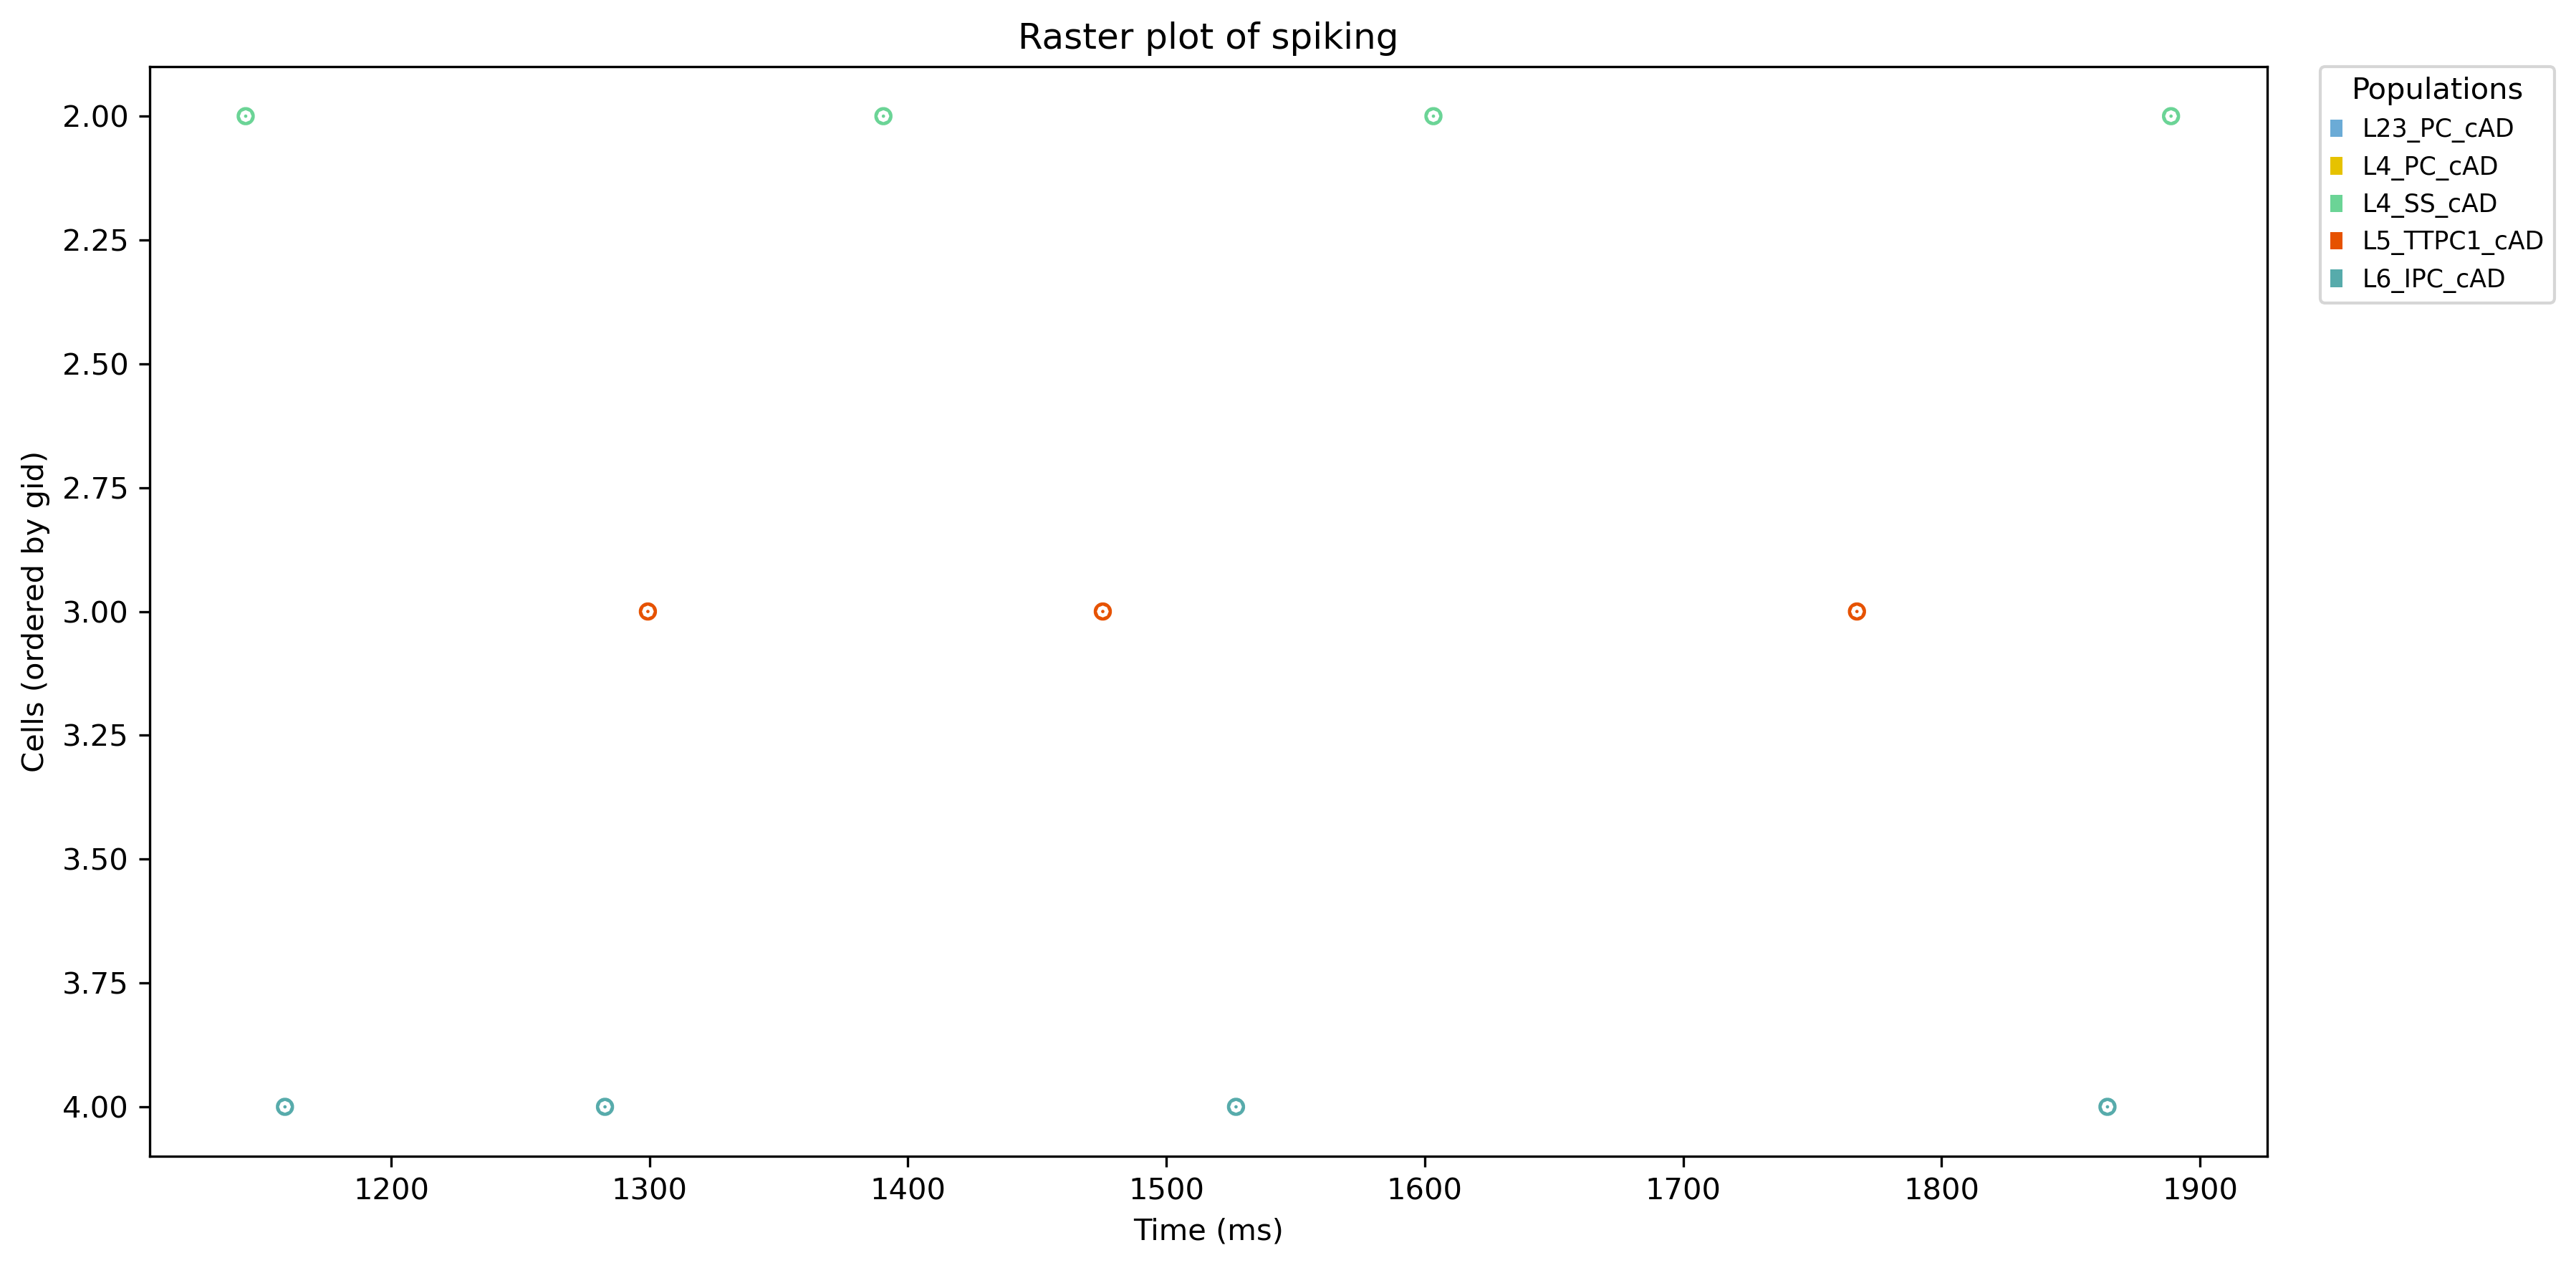

In [12]:
sim.analysis.plotRaster(**{'include': S1cells, 'saveFig': True, 'showFig': False, 'orderInverse': True, 'timeRange': timeRange, 'figSize': (12,6), 'fontSize':4, 'lw': 5, 'markerSize':10, 'marker': '.', 'dpi': 300})

In [5]:
sim.allSimData.keys()

dict_keys(['spkt', 'spkid', 'V_soma', 't', 'popRates', 'avgRate'])

In [7]:
histData=None
axis=None
popNumCells=None
popLabels=None
popColors=None
histType='step'
stacked=False
cumulative=False
log=False
density=False
legend=True
colorList=None
returnPlotter=False

include=[Ecells[1:4],Icells[54:83],Ecells[4:8],Icells[83:125]]

timeRange=[1000, 2000]

binSize=10

histData = sim.analysis.prepareSpikeHist(timeRange=timeRange, binSize=binSize)

Preparing spike data...


KeyboardInterrupt: 

In [12]:
spkTimes = histData['spkTimes']
spkInds = histData['spkInds']
popNumCells = histData.get('popNumCells')
popLabels = histData.get('popLabels')
numNetStims = histData.get('numNetStims', 0)
axisArgs = histData.get('axisArgs')
legendLabels = histData.get('legendLabels')


# Create a list to link cells to their populations
indPop = []
popGids = []
for popLabel, popNumCell in zip(popLabels, popNumCells):
    popGids.append(np.arange(len(indPop), len(indPop) + int(popNumCell)))
    indPop.extend(int(popNumCell) * [popLabel])
# Create a dictionary to link cells to their population
cellGids = list(set(spkInds))
gidPops = {cellGid: indPop[cellGid] for cellGid in cellGids}
# Set the time range appropriately
if 'timeRange' in histData:
    timeRange = histData['timeRange']
if timeRange is None:
    timeRange = [0, np.ceil(max(spkTimes))]

from netpyne.plotting.plotter import HistPlotter
import matplotlib.patches as mpatches

# Bin the data using Numpy
histoData = np.histogram(spkTimes, bins=np.arange(timeRange[0], timeRange[1], binSize))
histoBins = histoData[1]
histoCount = histoData[0]
# Create a dictionary with the inputs for a histogram plot
plotData = {}
plotData['x'] = spkTimes
plotData['bins'] = histoBins
plotData['range'] = histData.get('range', None)
plotData['density'] = density
plotData['weights'] = histData.get('weights', None)
plotData['cumulative'] = cumulative
plotData['bottom'] = histData.get('bottom', None)
plotData['histtype'] = histType
plotData['align'] = histData.get('align', 'mid')
plotData['orientation'] = histData.get('orientation', 'vertical')
plotData['rwidth'] = histData.get('rwidth', None)
plotData['log'] = log
plotData['color'] = histData.get('color', None)
plotData['linewidth'] = 1.0
plotData['alpha'] = histData.get('alpha', None)
plotData['label'] = histData.get('label', None)
plotData['stacked'] = stacked
plotData['data'] = histData.get('data', None)


# Create a dictionary to hold axis inputs
if not axisArgs:
    axisArgs = {}
    axisArgs['title'] = 'Histogram Plot of Spiking'
    axisArgs['xlabel'] = 'Time (ms)'
    axisArgs['ylabel'] = 'Number of Spikes'
    axisArgs['xlim'] = timeRange
    axisArgs['ylim'] = None

# create Plotter object
histPlotter = HistPlotter(data=plotData, kind='histogram', **axisArgs)
metaFig = histPlotter.metafig

# Create the labels and handles for the legend
# (use rectangles instead of markers because some markers don't show up well)
labels = []
handles = []
# Remove the sum of all population spiking when stacking
if stacked or histType == 'barstacked':
    if 'allCells' in include:
        include.remove('allCells')
# Deal with the sum of all population spiking (allCells)
if 'allCells' not in include:
    histPlotter.x = []
    histPlotter.color = []
else:
    histPlotter.x = [histPlotter.x]
    allCellsColor = 'black'
    if 'allCellsColor' in kwargs:
        allCellsColor = kwargs['allCellsColor']
    histPlotter.color = [allCellsColor]
    labels.append('All cells')
    handles.append(mpatches.Rectangle((0, 0), 1, 1, fc=allCellsColor))
# Handle individual pops and grouped pops
for subset in include:
    # if it's a single population
    if type(subset) not in [list, tuple]:
        for popIndex, popLabel in enumerate(popLabels):
            if popLabel == subset:
                # Get GIDs for this population
                currentGids = popGids[popIndex]
                # Use GIDs to get a spiketimes list for this population
                try:
                    spkinds, spkts = list(
                        zip(*[(spkgid, spkt) for spkgid, spkt in zip(spkInds, spkTimes) if spkgid in currentGids])
                    )
                except:
                    spkinds, spkts = [], []
                # Append the population spiketimes list to histPlotter.x
                histPlotter.x.append(spkts)
                # Append the population color to histPlotter.color
                histPlotter.color.append(popColors[popLabel])
                # Append the legend labels and handles
                if legendLabels:
                    labels.append(legendLabels[popIndex])
                else:
                    labels.append(popLabel)
                handles.append(mpatches.Rectangle((0, 0), 1, 1, fc=popColors[popLabel]))
    # if it's a group of populations
    else:
        allGids = []
        groupLabel = None
        groupColor = None
        for popIndex, popLabel in enumerate(popLabels):
            if popLabel in subset:
                # Get GIDs for this population
                currentGids = popGids[popIndex]
                allGids.extend(currentGids)
                if not groupLabel:
                    groupLabel = popLabel
                else:
                    groupLabel += ', ' + popLabel
        # Use GIDs to get a spiketimes list for this population
        try:
            spkinds, spkts = list(
                zip(*[(spkgid, spkt) for spkgid, spkt in zip(spkInds, spkTimes) if spkgid in allGids])
            )
        except:
            spkinds, spkts = [], []
        # Append the population spiketimes list to histPlotter.x
        histPlotter.x.append(spkts)
        # Append the population color to histPlotter.color
        histPlotter.color.append(groupColor)
        # Append the legend labels and handles
        labels.append(groupLabel)
        handles.append(mpatches.Rectangle((0, 0), 1, 1, fc=groupColor))

histPlotter.color = ['red', 'blue', 'black', 'orange']

histPlot = histPlotter.plot(**axisArgs)

histA = plt.hist(histPlotter.x,histPlotter.bins, histtype=histPlotter.histtype)

# plt.plot(histPlotter.bins[1:],np.transpose(histA[0]));
# plt.show();

plt.plot(histPlotter.bins[1:],histA[0][0],'-k');
plt.plot(histPlotter.bins[1:],histA[0][1],'-b');
plt.plot(histPlotter.bins[1:],histA[0][2],'-r');
plt.plot(histPlotter.bins[1:],histA[0][3],'-g');
plt.show();

TypeError: 'int' object is not subscriptable

In [13]:
sim.cfg.saveJson = True

In [14]:
sim.cfg.savePickle = False

In [15]:
sim.cfg.saveFolder = 'v101_batch1'

In [9]:
sim.analysis.plotRaster(**{'include': Icells, 'saveFig': filename[:-4]+'_RP_.png', 'showFig': False, 'legend': False, 'popRates': False, 'orderInverse': True, 'timeRange': [8350, 9450], 'orderBy':'y', 'fontSize':1, 'figSize': (24,24), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 100})
        

Preparing spike data...
No spikes available to plot raster
Plotting raster...

There was an exception in plotRaster()


Traceback (most recent call last):
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/utils.py", line 87, in wrapper
    return function(*args, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/plotting/plotRaster.py", line 268, in plotRaster
    popNumCells = [max(spkInds)]
UnboundLocalError: local variable 'spkInds' referenced before assignment


In [10]:
sim.analysis.plotSpikeHist(include=[Icells[83:99],Icells[99:115],Icells[115:122],Icells[122:125]], binSize=25, dpi=100, figSize=(24, 12), 
                                   timeRange=[8950, 9450], saveFig=filename[:-4] + '_L5I_hist_1sec.png')

Preparing spike data...
No spikes available to plot raster

There was an exception in prepareSpikeHist()
Plotting spike frequency...

There was an exception in plotSpikeFreq()


Traceback (most recent call last):
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/utils.py", line 87, in wrapper
    return function(*args, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/spikes.py", line 466, in prepareSpikeHist
    figData['axisArgs']['ylabel'] = 'Number of spikes'
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/utils.py", line 87, in wrapper
    return function(*args, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/plotting/plotSpikeFreq.py", line 240, in plotSpikeFreq
    popNumCells = [max(spkInds)]
UnboundLocalError: local variable 'spkInds' referenced before assignment


In [11]:
sim.analysis.plotSpikeHist(include=[Ecells[1:4],Icells[54:83],Ecells[4:8],Icells[83:125],Ecells[8:],Icells[125:]], binSize=25, figSize=(16, 8), 
                                   timeRange=[8950, 9450], dpi=300, saveData=filename[:-4] + '_L46_hist_0.5sec.json', saveFig=filename[:-4] + '_L46_hist_1sec.png')

Preparing spike data...
No spikes available to plot raster

There was an exception in prepareSpikeHist()
Plotting spike frequency...

There was an exception in plotSpikeFreq()


Traceback (most recent call last):
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/utils.py", line 87, in wrapper
    return function(*args, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/spikes.py", line 466, in prepareSpikeHist
    figData['axisArgs']['ylabel'] = 'Number of spikes'
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/analysis/utils.py", line 87, in wrapper
    return function(*args, **kwargs)
  File "/home/fernando/miniconda3/envs/p38/lib/python3.8/site-packages/netpyne/plotting/plotSpikeFreq.py", line 240, in plotSpikeFreq
    popNumCells = [max(spkInds)]
UnboundLocalError: local variable 'spkInds' referenced before assignment


In [ ]:
mkdir ../data/v101_batch1/

In [ ]:

# ###########################
# ######## MAIN CODE ########
# ###########################

# if __name__ == '__main__':

#     dataType = 'spont' #'speech' #'spont'

#     if dataType == 'spont':
#         filenames = ['../data/v109_batch3/v109_batch3_data.pkl']
#         timeRange = [9000, 10000]

#     layer_bounds= {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0]}

#     allData = []

#     for filename in filenames:

#         sim.load(filename, instantiate=True, instantiateConns = False, instantiateStims = False, instantiateRxD = False, createNEURONObj = False)

#         # standardd plots
#         # sim.analysis.plotRaster(**{'include': ['allCells'], 'saveFig': True, 'showFig': False, 'labels': None, 'popRates': False,'orderInverse': True, 'timeRange': timeRange, 'figSize': (48,36), 'fontSize':4, 'lw': 2, 'markerSize':2, 'marker': '.', 'dpi': 300})
#         # sim.analysis.plotRaster(**{'include': RP_L13, 'saveFig': filename[:-4]+'_RP_L13', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':8, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
#         sim.analysis.plotRaster(**{'include': RP_L45, 'saveFig': filename[:-4]+'_RP_L45.png', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':8, 'figSize': (24,18), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
#         # sim.analysis.plotRaster(**{'include': RP_L6, 'saveFig': filename[:-4]+'_RP_L6', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange': timeRange, 'orderBy':'y', 'fontSize':8, 'figSize': (24,12), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
#         # sim.analysis.plotSpikeStats(stats=['rate'],figSize = (6,12), timeRange=[1500, 31500], dpi=300, showFig=0, saveFig=filename[:-4]+'_stats_30sec')
#         sim.analysis.plotSpikeStats(include=,stats=['rate'],figSize = (6,12), timeRange=[9000, 10000], dpi=300, showFig=0, saveFig=filename[:-4]+'_stats_1sec.png')
#         #sim.analysis.plotLFP(**{'plots': ['spectrogram'], 'electrodes': ['avg', [0], [1], [2,3,4,5,6,7,8,9], [10, 11, 12], [13], [14, 15], [16,17,18,19]], 'timeRange': timeRange, 'maxFreq': 50, 'figSize': (8,24), 'saveData': False, 'saveFig': filename[:-4]+'_LFP_spec_7s_all_elecs', 'showFig': False})

#         for mtype in Epops:
#             sim.analysis.plotSpikeStats(include=,stats=['rate'],figSize = (6,12), timeRange=[9000, 10000], dpi=300, showFig=0, saveFig=filename[:-4] + '_' + mtype + '_stats_1sec.png')

#         for mtype in Epops:
#             print('\n\n',mtype,'  N =',popNumber[mtype])
#             sim.analysis.plotTraces(include=popLabelEl[mtype], timeRange=timeRange, overlay=True, oneFigPer='trace', subtitles=False, legend=False, ylim=[-110,50], 
#             axis=False, scaleBarLoc=3, figSize=(24, 2), fontSize=15, saveFig= filename[:-4] + '_' + mtype+ '_Vt.png');
                
#         sim.analysis.plotTraces(include=RP_L45, timeRange=timeRange, overlay=True, oneFigPer='trace', subtitles=False, legend=False, ylim=[-110,50], axis=False, scaleBarLoc=3, figSize=(24, 2), fontSize=15, saveFig= filename[:-4]+ '_RP_L45_Vt.png');
        
#         sim.analysis.plotSpikeHist(include=Ecells[0:1], binSize=2, figSize=(16, 8), timeRange=[9500, 9650], dpi=300, saveFig=filename[:-4] + '_L23Epops_hist_1sec.png')
        
#         sim.analysis.plotSpikeHist(include=[Icells[0:14],Icells[19:54]], binSize=5, figSize=(16, 8), timeRange=[9500, 9650], dpi=300, saveFig=filename[:-4] + '_L13Ipops_hist_1sec.png')

#         sim.analysis.plotSpikeHist(include=[popLabelEl[pop] for pop in Ipops[6:15] if popNumber[pop] > 80], binSize=2, figSize=(16, 8), timeRange=[9400, 9700], dpi=300, saveFig=filename[:-4] + '_L23Ipops_hist_1sec.png')

#         sim.analysis.plotSpikeHist(include=popLabelEl['L23_BP'], binSize=2, figSize=(16, 8), timeRange=[9400, 9700], dpi=300, saveFig=filename[:-4] + '_L23Ipops_hist_1sec.png')

#         sim.analysis.plotSpikeHist(include=[Ecells[0:1],Ecells[1:4],Ecells[4:8],Ecells[8:]], binSize=2, figSize=(16, 8), timeRange=[9400, 9700], dpi=300, saveFig=filename[:-4] + '_L45Epops_hist_1sec.png')

#         sim.analysis.plotSpikeHist(include=[Icells[54:83],Icells[83:125]], binSize=50, figSize=(16, 8), timeRange=[5000, 10000], dpi=300, saveFig=filename[:-4] + '_L45Ipops_hist_5sec.png')
#         sim.analysis.plotSpikeHist(include=[Ecells[1:4],Ecells[4:8]], binSize=50, figSize=(16, 8), timeRange=[5000, 10000], dpi=300, saveFig=filename[:-4] + '_L45Epops_hist_5sec.png')

#         sim.analysis.plotSpikeHist(include=[Icells[54:83],Icells[83:125]], binSize=5, figSize=(16, 8), timeRange=[9400, 9550], dpi=300, saveFig=filename[:-4] + '_L45Ipops_hist_150msec.png')
#         sim.analysis.plotSpikeHist(include=[Ecells[1:4],Ecells[4:8]], binSize=5, figSize=(16, 8), timeRange=[9400, 9550], dpi=300, saveFig=filename[:-4] + '_L45Epops_hist_150msec.png')

#         sim.analysis.plotSpikeHist(include=[Ecells[1:4],Icells[54:83],Ecells[4:8],Icells[83:125]], binSize=50, figSize=(16, 8), 
#                                    timeRange=[5000, 10000], dpi=300, saveFig=filename[:-4] + '_L45_hist_5sec.png')

#         sim.analysis.plotSpikeHist(include=[Ecells[1:4],Icells[54:83],Ecells[4:8],Icells[83:125]], binSize=5, figSize=(16, 8), timeRange=[9400, 9550], dpi=300, saveFig=filename[:-4] + '_L45_hist_150msec.png')

#         sim.analysis.plotSpikeHist(include=[Ecells[1:4],Icells[54:83],Ecells[4:8],Icells[83:125]], binSize=5, figSize=(16, 8), timeRange=[9485, 9535], 
#         dpi=300, histData=filename[:-4] + '_L45_hist_50msec.json', saveFig=filename[:-4] + '_L45_hist_50msec.png')


#         sim.analysis.plotSpikeHist(include=[Ecells[1:4]], binSize=5, figSize=(16, 8), timeRange=[9400, 9500], dpi=300, saveFig=filename[:-4] + '_L45_hist_150msec.png')


#         sim.analysis.plotSpikeHist(include=[Ecells[8:],Icells[125:]], binSize=50, figSize=(16, 8), timeRange=[5000, 10000], dpi=300, saveFig=filename[:-4] + '_L6_hist_5sec.png')

#         sim.analysis.plotSpikeHist(include=[Ecells[8:],Icells[125:]], binSize=5, figSize=(16, 8), timeRange=[9400, 9550], 
#         dpi=300, saveFig=filename[:-4] + '_L6_hist_150msec.png')



#         sim.analysis.plotSpikeHist(include=[Ecells,Icells], binSize=50, figSize=(16, 8), timeRange=[5000, 10000], 
#         dpi=300, saveFig=filename[:-4] + '_hist_5sec.png')

#         sim.analysis.plotSpikeHist(include=[Ecells,Icells], binSize=2, figSize=(16, 8), timeRange=[9485, 9535], 
#         dpi=300, saveFig=filename[:-4] + '_hist_50msec.png')
        
#         sim.analysis.plotRaster(**{'include': RP_L45, 'saveFig': filename[:-4]+'_RP_L45_150msec.png', 'showFig': False, 'popRates': 'minimal', 'orderInverse': True, 'timeRange':[9400, 9550] , 'orderBy':'y', 'fontSize':8, 'figSize': (24,18), 'lw': 4.0, 'markerSize': 4, 'marker': 'o', 'dpi': 300})
        
# # Icells[0:14],Icells[15:54],

#         for pops in cellParamLabels:
#             print('\n\n',pops,'  N =',cellNumber[pops])
#             sim.analysis.plotTraces(include=[pops], timeRange=timeRange, overlay=True, oneFigPer='trace', subtitles=False, legend=False, ylim=[-110,50], axis=False, scaleBarLoc=3, figSize=(24, 2), fontSize=15, saveFig=filename[:-4] + '_' + pops+ '_Vt.png');
        
#         # sim.analysis.plotRaster(**{'include': S1cells, 'saveFig': True, 'showFig': False, 'labels': None, 'popRates': False,'orderInverse': True, 'timeRange': timeRange, 'figSize': (36,24), 'fontSize':4, 'lw': 5, 'markerSize':10, 'marker': '.', 'dpi': 300})
                
#         # sim.analysis.plotLFP(**{'plots': ['locations'], 
#         #         'figSize': (24,24), 
#         #         'saveData': False, 
#         #         'saveFig': True, 'showFig': False, 'dpi': 300})

#         # sim.analysis.plotLFP(**{'plots': ['timeSeries'], 
#         #         # 'electrodes': 
#         #         # [[0,1,2,3]], #'avg', 
#         #         'timeRange': timeRange, 
#         #         'figSize': (24,12), 'saveFig': True, 'showFig': False})

#         # sim.analysis.plotLFP(**{'plots': ['spectrogram'], 
#         #         # 'electrodes': 
#         #         # [[0,1,2,3]],
#         #         'timeRange': timeRange, 
#         #         'minFreq': 100, 
#         #         'maxFreq': 500, 
#         #         'figSize': (16,12), 
#         #         'saveData': False, 
#         #         'saveFig': True, 'showFig': False})

#         # sim.analysis.plotLFP(**{'plots': ['PSD'], 
#         #         # 'electrodes': 
#         #         # [[0,1,2,3]],
#         #         'timeRange': timeRange, 
#         #         'minFreq': 100, 
#         #         'maxFreq': 500, 
#         #         'figSize': (8,12), 
#         #         'saveData': False, 
#         #         'saveFig': True, 'showFig': False})
